In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
data = pd.read_csv('onlinefraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [23]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [24]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


<Axes: xlabel='type', ylabel='count'>

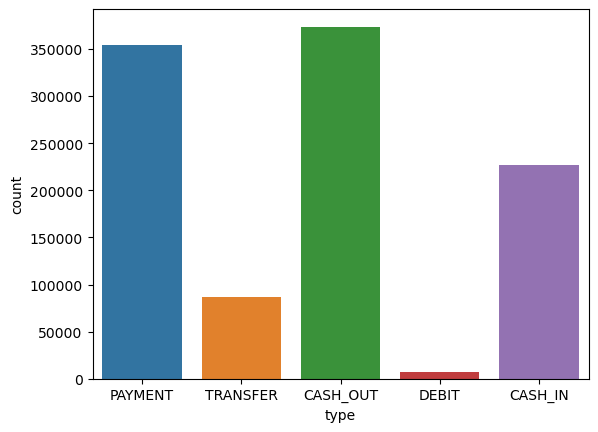

In [25]:
sns.countplot(x='type', data=data)

<Axes: xlabel='type', ylabel='amount'>

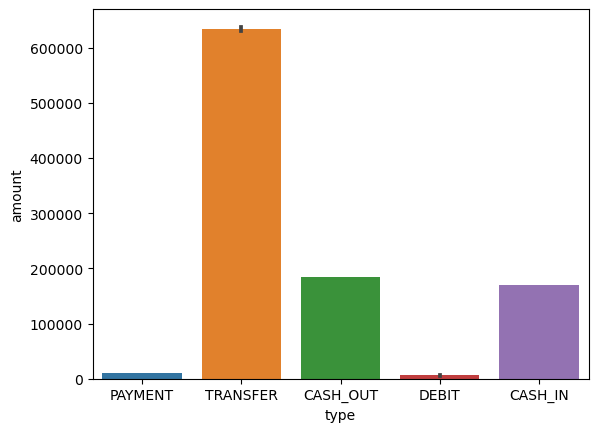

In [26]:
sns.barplot(x='type', y='amount', data=data)

In [27]:
data['isFraud'].value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

In [32]:
from sklearn.utils import resample

In [38]:
non_fraud = data[data['isFraud'] == 0]
fraud = data[data['isFraud'] == 1]

num_samples = min(len(non_fraud), len(fraud))
# print(num_samples)
non_fraud_undersampled = resample(non_fraud, replace=False, n_samples=num_samples, random_state=42)

balanced_df = pd.concat([non_fraud_undersampled, fraud])
balanced_df = balanced_df.sample(frac=1, random_state=42)
balanced_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
81342,10,PAYMENT,10958.44,C1724583054,0.00,0.00,M262559681,0.00,0.00,0
1030716,86,CASH_OUT,6972164.97,C1268472825,6972164.97,0.00,C2126149202,5680.28,6977845.25,1
1030772,92,CASH_OUT,271908.40,C71055143,271908.40,0.00,C1732817669,1488088.26,1759996.66,1
1030506,69,CASH_OUT,271731.05,C48017106,271731.05,0.00,C1750307657,0.00,271731.05,1
929228,43,TRANSFER,466013.48,C450050263,67620.00,0.00,C918924733,0.00,466013.48,0
...,...,...,...,...,...,...,...,...,...,...
899577,42,TRANSFER,1917497.63,C373557981,1917497.63,0.00,C114416170,0.00,0.00,1
987786,45,CASH_IN,90016.84,C1739014367,21234.00,111250.84,C1947527507,1691662.88,1601646.04,0
872967,42,CASH_OUT,55963.20,C1284017456,10919.00,0.00,C2087603149,0.00,55963.20,0
217320,13,TRANSFER,6188514.81,C135832352,6188514.81,0.00,C2009346140,0.00,0.00,1


In [48]:
balanced_df['isFraud'].value_counts()

isFraud
0    1142
1    1142
Name: count, dtype: int64

In [49]:
# plt.figure(figsize=(12, 6))
# sns.heatmap(balanced_df.corr(),
#             cmap='BrBG',
#             fmt='.2f',
#             linewidths=2,
#             annot=True)

In [53]:
type_new = pd.get_dummies(balanced_df['type'], drop_first=True)
data_new = pd.concat([balanced_df, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
81342,10,PAYMENT,10958.44,C1724583054,0.00,0.0,M262559681,0.00,0.00,0,False,False,True,False
1030716,86,CASH_OUT,6972164.97,C1268472825,6972164.97,0.0,C2126149202,5680.28,6977845.25,1,True,False,False,False
1030772,92,CASH_OUT,271908.40,C71055143,271908.40,0.0,C1732817669,1488088.26,1759996.66,1,True,False,False,False
1030506,69,CASH_OUT,271731.05,C48017106,271731.05,0.0,C1750307657,0.00,271731.05,1,True,False,False,False
929228,43,TRANSFER,466013.48,C450050263,67620.00,0.0,C918924733,0.00,466013.48,0,False,False,False,True


In [54]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [57]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
81342,10,10958.44,0.00,0.00,0.00,0.00,False,False,True,False
1030716,86,6972164.97,6972164.97,0.00,5680.28,6977845.25,True,False,False,False
1030772,92,271908.40,271908.40,0.00,1488088.26,1759996.66,True,False,False,False
1030506,69,271731.05,271731.05,0.00,0.00,271731.05,True,False,False,False
929228,43,466013.48,67620.00,0.00,0.00,466013.48,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
899577,42,1917497.63,1917497.63,0.00,0.00,0.00,False,False,False,True
987786,45,90016.84,21234.00,111250.84,1691662.88,1601646.04,False,False,False,False
872967,42,55963.20,10919.00,0.00,0.00,55963.20,True,False,False,False
217320,13,6188514.81,6188514.81,0.00,0.00,0.00,False,False,False,True


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
! pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 325.1 kB/s eta 0:06:25
   ---------------------------------------- 0.1/124.9 MB 651.6 kB/s eta 0:03:12
   ---------------------------------------- 0.1/124.9 MB 853.3 kB/s eta 0:02:27
   ---------------------------------------- 0.2/124.9 MB 908.0 kB/s eta 0:02:18
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:58
   ---------------------------------------- 0.4/124.9 MB 1.2 MB/s eta 0:01:47
   ---------------------------------------- 0.4/124.9 MB 1.3 MB/s eta 0:01:40
   -------------------------

In [62]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [63]:
models = [LogisticRegression(), XGBClassifier(),
          SVC(kernel='rbf', probability=True),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy', 
                                 random_state=7)]
 
for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
     
    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))
     
    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

LogisticRegression() : 
Training Accuracy :  0.9709453191596049
Validation Accuracy :  0.9656628968524322

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.9942686333287915

SVC(probability=True) : 
Training Accuracy :  0.8986799879657024

In [65]:
# XGB and RFC are performing good 